In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('ccdefault.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [2]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
tree = DecisionTreeClassifier(criterion='entropy',random_state=1,max_depth=None)


In [3]:
lis = [1, 10, 100, 200, 300, 400]
for i in lis:
    forest=RandomForestClassifier(criterion='gini',n_estimators=i,random_state=1,n_jobs=2)
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import train_test_split
    X= df.iloc[:, 0:23]
    y= df.iloc[:, 24]
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=21)
    forest=forest.fit(X_train,y_train)
    y_train_pred=forest.predict(X_train)
    forest_train=cross_val_score(estimator=forest,X=X_train,y=y_train,cv=10,n_jobs=1)
    forest_test =cross_val_score(estimator=forest,X=X_test,y=y_test,cv=10,n_jobs=1)
    print('n_estimators = ')
    print(i)
    print('RF in sample accuracy')
    print(forest_train)
    print('RF out sample accuracy')
    print(forest_test)
  

n_estimators = 
1
RF in sample accuracy
[0.71962963 0.73481481 0.73888889 0.7237037  0.72185185 0.73148148
 0.72518519 0.71037037 0.73111111 0.72111111]
RF out sample accuracy
[0.72       0.74333333 0.68333333 0.71333333 0.73       0.73
 0.69333333 0.7        0.71666667 0.7       ]
n_estimators = 
10
RF in sample accuracy
[0.80185185 0.80851852 0.81296296 0.80444444 0.8062963  0.80740741
 0.79740741 0.81       0.80518519 0.8037037 ]
RF out sample accuracy
[0.81666667 0.82666667 0.79666667 0.81666667 0.81       0.8
 0.82333333 0.77666667 0.77333333 0.79666667]
n_estimators = 
100
RF in sample accuracy
[0.81814815 0.83       0.83111111 0.82481481 0.81518519 0.81148148
 0.80222222 0.81925926 0.80703704 0.81481481]
RF out sample accuracy
[0.82       0.85333333 0.80666667 0.84       0.82333333 0.82333333
 0.83666667 0.77       0.78333333 0.83333333]
n_estimators = 
200
RF in sample accuracy
[0.81925926 0.8262963  0.83185185 0.82777778 0.81481481 0.81296296
 0.80185185 0.81444444 0.80962963 

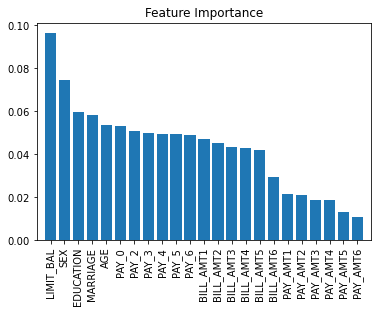

In [4]:
import numpy as np
import matplotlib.pyplot as plt
feat_labels=df.columns[1:]
importances =forest.feature_importances_
indices = np.argsort(importances)[::-1]
#for f in range (X_train.shape[1]):
#    print("%2d %-* %f" % (f+1,30,feat_labels[indices[f]],importances[indices[f]]))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),importances[indices],align='center')
plt.xticks(range(X_train.shape[1]),feat_labels,rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.show()